In [49]:
# Import Modules

from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
# from rasterio.plot import plotting_extent
# from rasterio.plot import show
# from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [50]:
import spectral.io.envi as envi
from find_path_nextcloud import find_path_nextcloud


path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Dessau/Hyperspektral/'
file_name = 'Dessau_unsigned_mosaik_all.hdr'

path_file = path_folder + file_name

In [51]:
# Read Header-Info (.hdr)
file_hdr = envi.open(path_file)
file_hdr

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Dessau/Hyperspektral/Dessau_unsigned_mosaik_all.dat'
	# Rows:          10211
	# Samples:        9454
	# Bands:            80
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

In [52]:
# Ausgabe Übersicht Header
print('Anzahl Bänder:', len(file_hdr.bands.centers))
print('Einheit Bänder:', file_hdr.bands.band_unit)
print('Wellenlängenbereich von', round(min(file_hdr.bands.centers)), 'bis', round(max(file_hdr.bands.centers)))

Anzahl Bänder: 80
Einheit Bänder: Nanometers
Wellenlängenbereich von 416 bis 991


In [53]:
print('Metadaten')
file_meta = file_hdr.metadata

Metadaten


In [54]:
file_meta['map info']

['UTM',
 '1.000',
 '1.000',
 '306984.850',
 '5749110.050',
 '3.000000e-001',
 '3.000000e-001',
 '33',
 'North',
 'WGS-84',
 'units=Meters']

In [55]:

path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Dessau/Hyperspektral/'


path_hdr = path_folder + 'Dessau_unsigned_mosaik_all.hdr'
path_dat =  path_folder + 'Dessau_unsigned_mosaik_all.dat'

img = envi.open(file=path_hdr, image=path_dat)

In [56]:
img

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Dessau/Hyperspektral/Dessau_unsigned_mosaik_all.dat'
	# Rows:          10211
	# Samples:        9454
	# Bands:            80
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

In [57]:
from spectral import *

In [58]:
img = open_image(file=path_hdr)

In [59]:
img.__class__

spectral.io.bsqfile.BsqFile

In [60]:
img.shape


(10211, 9454, 80)

In [61]:
print(img)

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Dessau/Hyperspektral/Dessau_unsigned_mosaik_all.dat'
	# Rows:          10211
	# Samples:        9454
	# Bands:            80
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16


In [62]:
pixel = img[4500:5500,4500:5500]

pixel.shape

(1000, 1000, 80)

In [63]:
bands = img[:,:,5]
bands.shape

(10211, 9454, 1)

In [64]:
arr = img.load()
arr.__class__

spectral.image.ImageArray

In [65]:
print(arr.info())


	# Rows:          10211
	# Samples:        9454
	# Bands:            80
	Data format:   float32


In [66]:
arr.shape

(10211, 9454, 80)

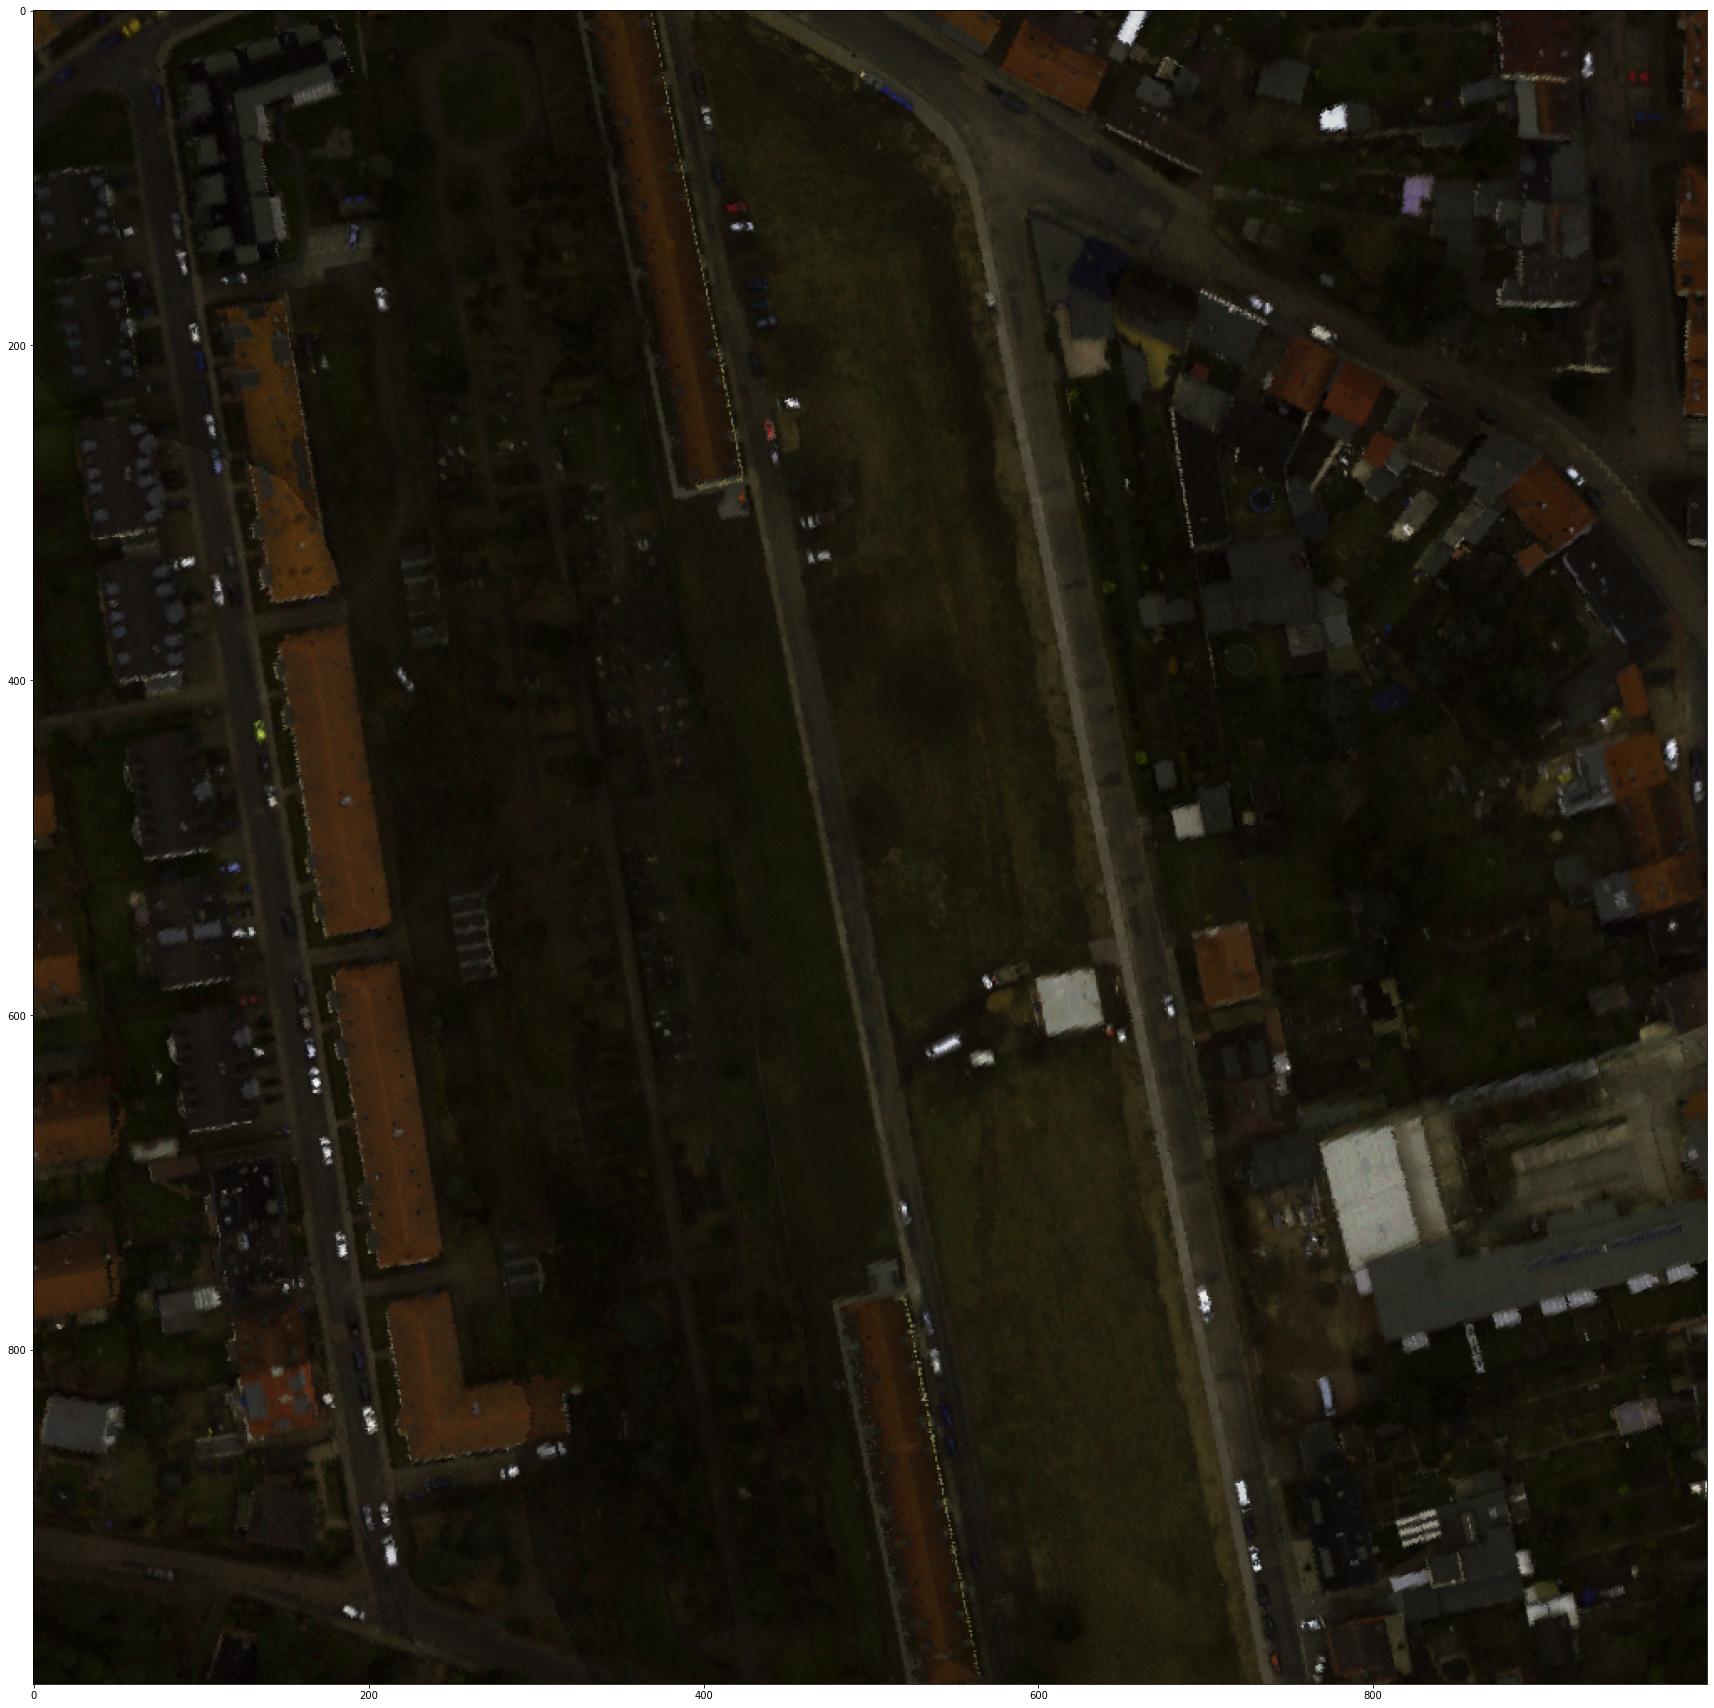

In [67]:
view = imshow(pixel,(27,21,4), figsize=(30,50))

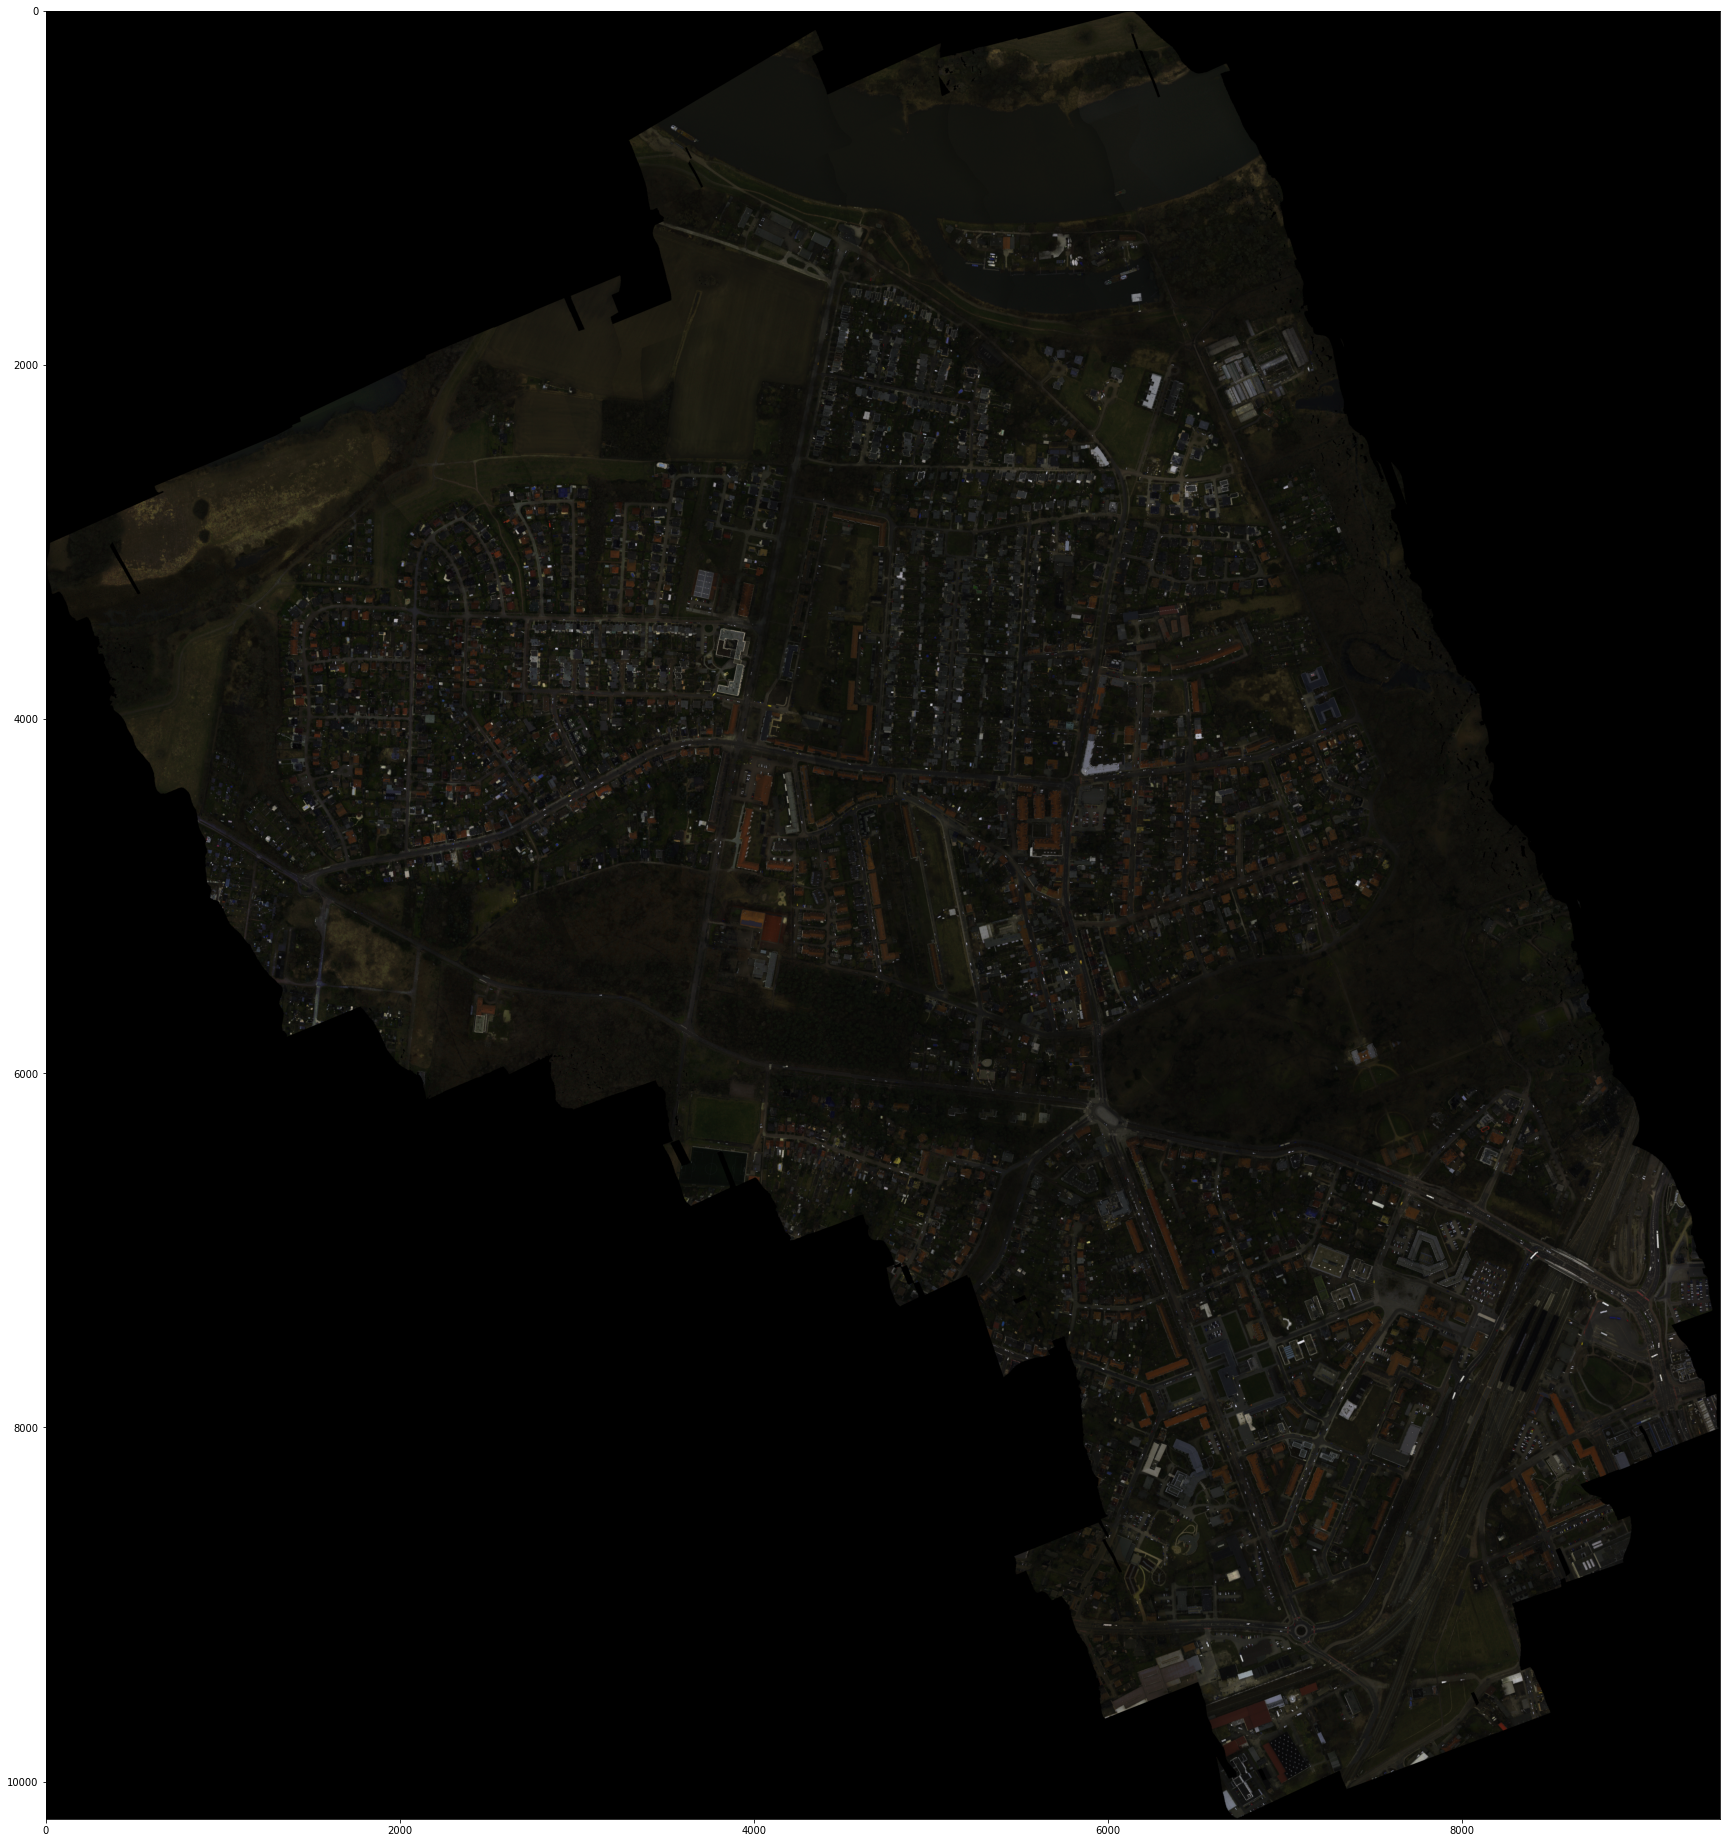

In [68]:
view = imshow(arr,(27,21,4), figsize=(30,50))



In [69]:
save_rgb(filename = 'test_rgb.jpg', data = pixel, bands=(27,21,4))

In [70]:
save_rgb(filename = 'Dessau.jpg', data = arr, bands=(27,21,4))